In [1]:
import pandas as pd
from scipy import stats

from tournament_simulator import Data, Submission, Tournament, round_names

ModuleNotFoundError: No module named 'graphviz'

> **Important: If you "copy and edit" (fork) this notebook the data sources will come along with it. If you recreate a fresh notebook you will need to add the competition data and [this utility script for simulation](https://www.kaggle.com/code/rsa013/ncaa-simulator)**

### load data
Note to run this nb you will need to have you submission file accessible via kaggle. I have added mine from a notebook that created the submission - you may be able to add your submission as a private dataset and link it, but I have not tried that.

I have added one of the public notebooks from the competition as example.

There is now a version of this focused on manually editing your bracket here: [Bracket Simulation Visualization](https://www.kaggle.com/rsa013/bracket-simulation-visualization)

In [2]:
## load data
mw = 'M' # or 'W'
ncaa_data = Data(mw, dir='/kaggle/input/march-machine-learning-mania-2023')
sub_df = pd.read_csv('/kaggle/input/xgboost-men-2023/finalsubmission.csv') # add your results as data to this notebook and edit this path to point to it
submission = Submission(sub_df=sub_df, data=ncaa_data)

### Initiate a tourney from data and submission


In [3]:
season = 2023
tourney = Tournament(data=ncaa_data, submission=submission, season=season)

### simulate one tourney and visualize

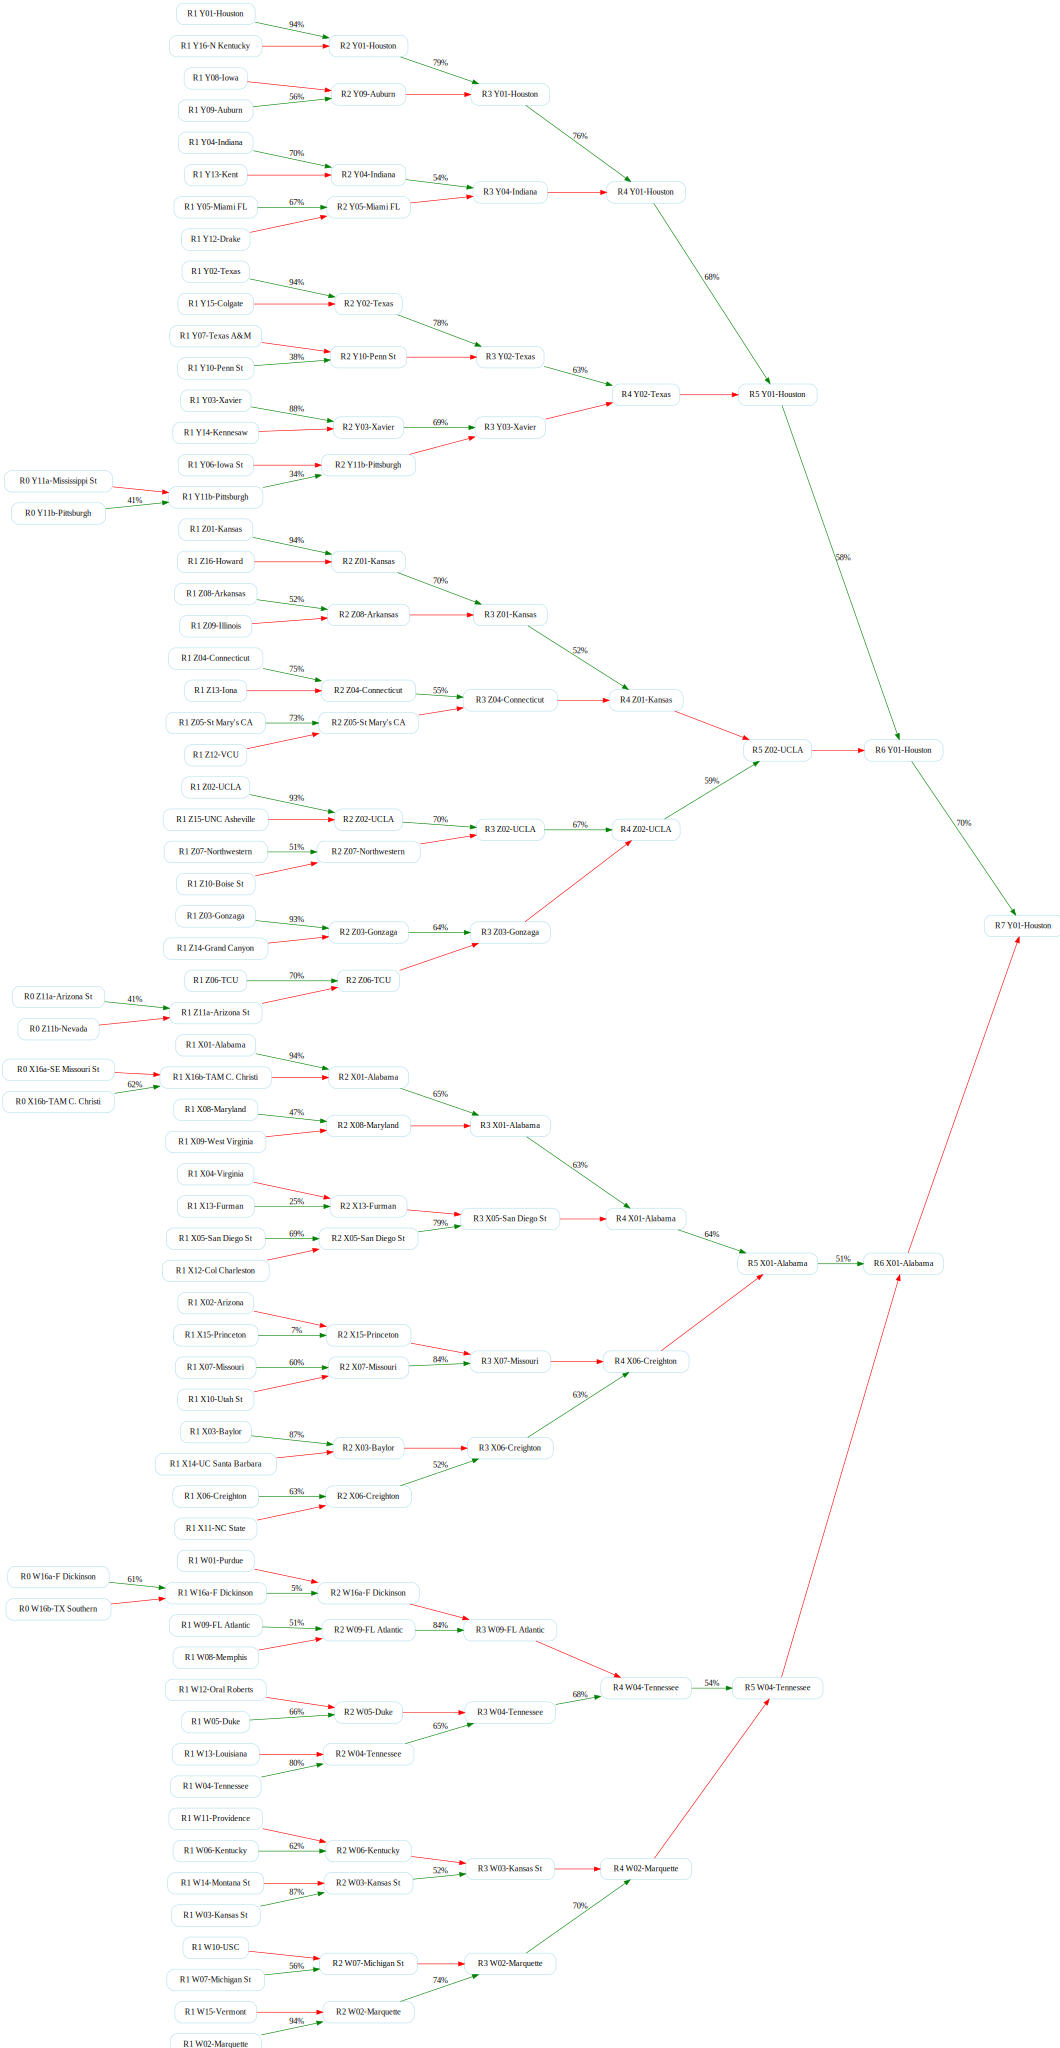

In [4]:
tourney.reset_tournament()
tourney.get_historic_results() # comment this out if you don't want to see the actual game results
tourney.simulate_tournament(style='chalk') # this runs a chalk bracket where your predicted winner wins every game
# tourney.simulate_tournament(style='random',seed=123) # change the seed to get a different result
graph = tourney.graph_games()
graph

### save bracket to working folder

In [5]:
import graphviz

my_graph = graphviz.Source(graph)
my_graph.render('./bracket.pdf', view=False)

'./bracket.pdf.pdf'

### simulate multiple tourneys and track results

Note that if you want more reliable accuracies you might want to bump up the number of simulations. Unfortunately it isn't very my code isn't very performant and takes a couple seconds per simulation on the Kaggle nbs.

The odds are calculated by tallying the number of times a team has **won** in a give round divided by the total number of simulations. The total probabilities for the Elite 8 column should add up to 4 (not 1) because 4 teams win the Elite 8 (and move on to the Final 4) in each tournament.

In [6]:
n_sim = 10
results, expected_losses = tourney.simulate_tournaments(n_sim=n_sim)
odds = results.copy()
odds.iloc[:,1:] = (results.iloc[:,1:]  / n_sim)
print(f'mean expected brier: {expected_losses.mean()} \n'
      f'standard dev brier: {expected_losses.std()} \n'
      f'standard error brier: {stats.sem(expected_losses)} \n')
print('Odds to win a given round')
odds.sort_values('Sweet 16', ascending=False).head(30)

mean expected brier: 0.18489593735559667 
standard dev brier: 0.015061974199396271 
standard error brier: 0.005020658066465423 

Odds to win a given round


,Team,Play-in Games,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship
1345,W01 - Purdue,0.0,1.0,0.9,0.8,0.6,0.2,0.2
1112,X02 - Arizona,0.0,0.9,0.6,0.6,0.3,0.2,0.2
1222,Y01 - Houston,0.0,0.9,0.8,0.6,0.4,0.1,0.0
1104,X01 - Alabama,0.0,0.9,0.6,0.6,0.3,0.1,0.0
1417,Z02 - UCLA,0.0,0.7,0.6,0.5,0.2,0.2,0.2
1400,Y02 - Texas,0.0,1.0,0.8,0.4,0.3,0.2,0.1
1242,Z01 - Kansas,0.0,1.0,0.6,0.4,0.1,0.1,0.1
1246,W06 - Kentucky,0.0,1.0,0.5,0.4,0.2,0.1,0.0
1462,Y03 - Xavier,0.0,1.0,0.7,0.3,0.1,0.0,0.0
1266,W02 - Marquette,0.0,1.0,0.8,0.3,0.0,0.0,0.0
